# Sequential Model 

In [1]:
# Import Dependencies
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.utils import to_categorical 

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from tensorflow.keras.callbacks import EarlyStopping

## Trial #7: Model from scratch 

In [2]:
# Load CSV
data = pd.read_csv(r"C:\Users\kaitl\Documents\Vandy_BootCamp\fer2013.csv")

# Filter for happy (label 3) and sad (label 4)
filtered = data[data['emotion'].isin([3,4])]

# Map labels: 3 → 0 (happy), 4 → 1 (sad)
filtered['emotion'] = filtered['emotion'].map({3: 0, 4: 1})

# Name the labels
label_names = {0: 'happy', 1: 'sad'}

# Convert pixels string to numpy array
X = []
for i in range(len(filtered)):
    img = np.fromstring(filtered.iloc[i]['pixels'], sep=' ').reshape(48,48)
    X.append(img)

X = np.array(X)
y = filtered['emotion'].values

# Normalize pixel values
X = X / 255.0

# Reshape for CNN input
X = X.reshape(-1, 48, 48, 1)

# One-hot encode labels
y = to_categorical(y, 2)

print(f"Shape of X: {X.shape}")
print(f"Shape of y: {y.shape}")


C:\Users\kaitl\AppData\Local\Temp\ipykernel_22296\1172564113.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered['emotion'] = filtered['emotion'].map({3: 0, 4: 1})


Shape of X: (15066, 48, 48, 1)
Shape of y: (15066, 2)


In [3]:
# Build the model
model = Sequential([
    Conv2D(32, (3,3), activation='relu', input_shape=(48,48,1)),
    MaxPooling2D(2,2),
    Conv2D(64, (3,3), activation='relu'),
    MaxPooling2D(2,2),
    Flatten(),
    Dense(128, activation='relu'),
    Dropout(0.5),
    Dense(2, activation='softmax')
])

model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# Early stopping
early_stop = EarlyStopping(patience=5, restore_best_weights=True)

# Train the model
history = model.fit(X, y, validation_split=0.2, epochs=20, batch_size=64, callbacks=[early_stop])


c:\Users\kaitl\anaconda3\envs\env1\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/20
189/189 ━━━━━━━━━━━━━━━━━━━━ 10s 45ms/step - accuracy: 0.6167 - loss: 0.6572 - val_accuracy: 0.7425 - val_loss: 0.5195
Epoch 2/20
189/189 ━━━━━━━━━━━━━━━━━━━━ 8s 40ms/step - accuracy: 0.7290 - loss: 0.5280 - val_accuracy: 0.7601 - val_loss: 0.4716
Epoch 3/20
189/189 ━━━━━━━━━━━━━━━━━━━━ 7s 39ms/step - accuracy: 0.7790 - loss: 0.4599 - val_accuracy: 0.7721 - val_loss: 0.4479
Epoch 4/20
189/189 ━━━━━━━━━━━━━━━━━━━━ 7s 39ms/step - accuracy: 0.7911 - loss: 0.4298 - val_accuracy: 0.7993 - val_loss: 0.4136
Epoch 5/20
189/189 ━━━━━━━━━━━━━━━━━━━━ 7s 39ms/step - accuracy: 0.8181 - loss: 0.3879 - val_accuracy: 0.8165 - val_loss: 0.3920
Epoch 6/20
189/189 ━━━━━━━━━━━━━━━━━━━━ 7s 38ms/step - accuracy: 0.8394 - loss: 0.3530 - val_accuracy: 0.8242 - val_loss: 0.3866
Epoch 7/20
189/189 ━━━━━━━━━━━━━━━━━━━━ 7s 38ms/step - accuracy: 0.8539 - loss: 0.3226 - val_accuracy: 0.8248 - val_loss: 0.3719
Epoch 8/20
189/189 ━━━━━━━━━━━━━━━━━━━━ 7s 38ms/step - accuracy: 0.8737 - loss: 0.2869 - val_acc

### Evaluate the Model

In [4]:
# Evaluate the model accuracy
loss, accuracy = model.evaluate(X, y)
print(f"Model Loss: {loss}")
print(f"Model Accuracy: {accuracy}")

471/471 ━━━━━━━━━━━━━━━━━━━━ 3s 7ms/step - accuracy: 0.9028 - loss: 0.2392
Model Loss: 0.2611351013183594
Model Accuracy: 0.8904154896736145


**Sequential (from-scratch) w/ weights** (2 classes)

Training Results:
- Accuracy: 0.9028
- Loss: 0.2392

Test Results:
- Accuracy: 0.8904
- Loss: 0.2611

**Question: Was this model successful?** Yes. 

**Analysis**: The model achieves a high training accuracy (90.28%) and test accuracy (89.04%), indicating that it performs well on both the training and test datasets. The small gap between training and test accuracy suggests that the model generalizes well and is not overfitting. Since this model is trained on 2 classes, it is a simpler task compared to multi-class classification (e.g., 7 classes). This simplicity likely contributes to the model's success.

**Conclusion**: The Sequential model trained from scratch for 2-class classification is highly successful, achieving nearly 90% accuracy on the test set with low loss. This indicates that the model is well-suited for the binary classification task and effectively learns from the dataset.

## Plot the Model

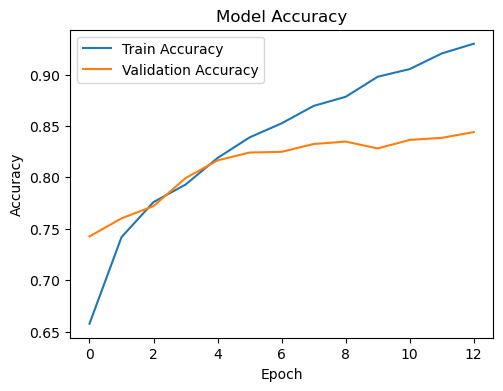

In [5]:
# Plot training history
plt.figure(figsize=(12, 4))
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend()

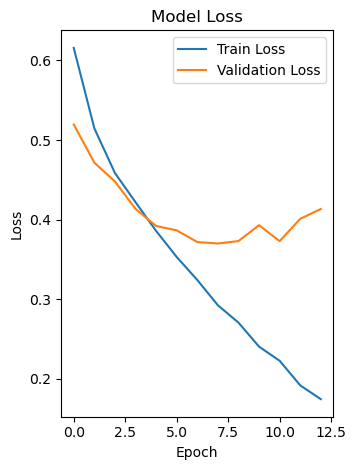

In [6]:
# Plot the loss
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend()
plt.tight_layout()
plt.show()

In [7]:
#save the model
model.save('scratch_model.h5')
